# Hackathon 3
# Group 16

## Load and view the simulated data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests

print("Downloading files off google drive...")

f_prefix = "gauss"

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1N1wVk5C64p2fy7kxx7fGpvQA8--Bq38W",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1__SGeKUwQCXLZa83-nKH1Twhh99Lu7tb",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1kRYLhoi1ClSKQbKBnp9asI5_hOoST_Hd",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1IWaUbkaLh4XbK8CWrx-VZ78RteKBcwVj",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=18N_p6aCJJp_xoYkws5vFX_-mOxqZDkaG",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# now repeat, but for RKKY type function

f_prefix = "RKKY"    

# data for model creation
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=1wF0rJB-JpSYohH8MEV-a4E-uw5R5Dxd4",allow_redirects=True)
open(mat_file, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1bagiHH3-bGAbQIpZalBSPWxg4AAczfpP",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1PvgRwdlJaDpsqElyU8oebfoaV2t13w35",allow_redirects=True)
open(M_file_i, "wb").write(r.content)

# data for submission of final model
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

r = requests.get("https://docs.google.com/uc?export=download&id=10Cd91DR4qzFCqWonkjvJ9ZhhHphJOi7q",allow_redirects=True)
open(M_file_r, "wb").write(r.content)
r = requests.get("https://docs.google.com/uc?export=download&id=1Wrab6Dk9IgRKPuzeEUiB-C5xEiVoFynr",allow_redirects=True)
open(M_file_i, "wb").write(r.content)    
    
    
print("Done with file downloads")

Done with file downloads


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import requests

### Change the following "f_prefix" variable to select a different model to load and train on


In [177]:
f_prefix = "gauss"; # Gaussian functional between nuclei
#f_prefix = "RKKY"; # RKKY functional between nuclei

### Now load the data and format it correctly

In [178]:
mat_file = f_prefix+"_mat_info_model.txt"
M_file_r = f_prefix+"_echos_model_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_model_i.txt" # imaginary part of echos

print("Loading into numpy arrays...")
# settings of each simulated material:
# format:  |   α  |   ξ  |   d  |
mat_info = np.loadtxt(mat_file, comments="#", delimiter=None, unpack=False);

# M(t) curve for each simulation, model:
M_r = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M = M_r + 1j*M_i;

# M(t) curve for each simulation, eval:
M_file_r = f_prefix+"_echos_eval_r.txt" # real part of echos
M_file_i = f_prefix+"_echos_eval_i.txt" # imaginary part of echos

M_r_eval = np.loadtxt(M_file_r, comments="#", delimiter=None, unpack=False);
M_i_eval = np.loadtxt(M_file_i, comments="#", delimiter=None, unpack=False);
M_eval = M_r_eval + 1j*M_i_eval;

print("Done with numpy loads")

Loading into numpy arrays...
Done with numpy loads


### View the data with three plots, two with a specific curve and one with a lot of curves

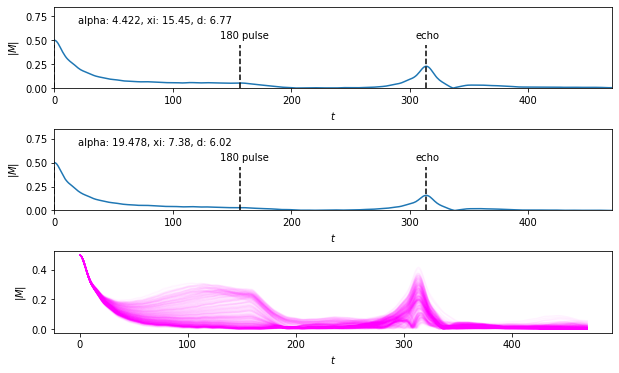

In [179]:
fig1, ax1 = plt.subplots(3,1, figsize=(10,6));

# change the following to see different curves
plot_idx1 = 0; # weak spin-spin coupling
plot_idx2 = 10; # strong spin-spin coupling

# string format for material parameter plotting
mat_format = "alpha: %.3f, xi: %.2f, d: %.2f";

# view the selected curve, with a label of the material data
ax1[0].plot(abs(M[plot_idx1,:]));
ax1[0].text(20,0.68, mat_format % tuple(mat_info[plot_idx1,:]) );
ax1[0].plot([0, 0],[0, .45],'--k')
ax1[0].plot([157, 157],[0, .45],'--k')
ax1[0].text(140,0.52,"180 pulse")
ax1[0].text(305,0.52,"echo")
ax1[0].plot([2*157, 2*157],[0, .45],'--k')
ax1[0].axis([0, 471, 0, 0.85])
ax1[0].set(ylabel="$|M|$", xlabel="$t$");

# view the selected curve, with a label of the material data
ax1[1].plot(abs(M_i[plot_idx2,:]));
ax1[1].text(20,0.68, mat_format % tuple(mat_info[plot_idx2,:]) );
ax1[1].plot([0, 0],[0, .45],'--k')
ax1[1].plot([157, 157],[0, .45],'--k')
ax1[1].text(140,0.52,"180 pulse")
ax1[1].text(305,0.52,"echo")
ax1[1].plot([2*157, 2*157],[0, .45],'--k')
ax1[1].axis([0, 471, 0, 0.85])
ax1[1].set(ylabel="$|M|$", xlabel="$t$");

ax1[2].plot(abs(M[1:500,:]).T,color='magenta', alpha=0.025 );
ax1[2].set(ylabel="$|M|$", xlabel="$t$");

fig1.subplots_adjust(hspace=.5)

### Truncate, scale, and partition the training/testing sets

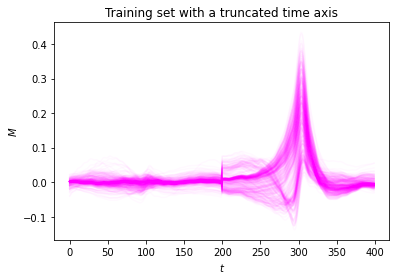

In [180]:
# number of M(t) curves
N_data = np.shape(M)[0]
# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!
time_keep = range(210,410); # centered roughly at the echo
M_trunc = M[:,time_keep];
# split into real and imaginary
M_trunc_uncomplex = np.concatenate((np.real(M_trunc), np.imag(M_trunc)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train, M_test, mat_train, mat_test = train_test_split(M_trunc_uncomplex, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((M_train[1:500,:]).T,color='magenta', alpha=0.025);
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with a truncated time axis");

In [111]:
M_train.shape

(5400, 400)

## To use all of the curve

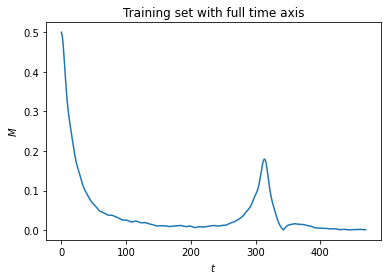

In [181]:
# number of M(t) curves
N_data = np.shape(M)[0]
# truncate time points
# !!! NOTE: May want to use all of the curve, takes longer to train though !!!

# split into real and imaginary
#M_uncomplex = np.concatenate((np.real(M), np.imag(M)),axis=1)

# rescale data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

mat_info_scaled = sc.fit_transform(mat_info);

# partition data into a training and testing set using a random partition
from sklearn.model_selection import train_test_split
M_train_full, M_test_full, mat_train_full, mat_test_full = train_test_split(M, mat_info_scaled, test_size=0.1)

# plot the fist 500 elements of the training set, for visualizing variations in the data
plt.plot((abs(M_train_full[1,:])));
plt.xlabel("$t$")
plt.ylabel("$M$")
plt.title("Training set with full time axis");

In [174]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, SGD, Adamax # gradient descent optimizer
from sklearn.model_selection import GridSearchCV

# clear previous layers
tensorflow.keras.backend.clear_session()

N = np.shape(M_train[0])[0] # number of input values from M(t) curve

## Guassian function

### Optimizer selection

In [16]:
def build_model_optimizer(optimizer):
    model = Sequential([
        InputLayer(input_shape=N),
        Dense(200, activation='elu', kernel_initializer='he_normal'),
        Dense(100, activation='elu', kernel_initializer='he_normal'),
        Dense(50, activation='elu', kernel_initializer='he_normal'),
        Dense(3, activation='linear')
    ])

    model.compile(loss='mean_squared_error', optimizer=optimizer) 
    return model

keras_reg_optimizer = keras.wrappers.scikit_learn.KerasRegressor(build_model_optimizer)


param_distribs = {
             'optimizer':['sgd', 'adagrad', 'rmsprop', 'adam', 'nadam', 'adamax', 'adadelta']
}

optimizer_search_cv = GridSearchCV(keras_reg_optimizer, param_distribs, cv=3)

grid_result = optimizer_search_cv.fit(M_train, mat_train, epochs=100,batch_size=64, verbose=2)

# summary results
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))


Train on 3600 samples
Epoch 1/100
3600/3600 - 1s - loss: 0.9492
Epoch 2/100
3600/3600 - 0s - loss: 0.9248
Epoch 3/100
3600/3600 - 0s - loss: 0.9091
Epoch 4/100
3600/3600 - 0s - loss: 0.8934
Epoch 5/100
3600/3600 - 0s - loss: 0.8791
Epoch 6/100
3600/3600 - 0s - loss: 0.8628
Epoch 7/100
3600/3600 - 0s - loss: 0.8460
Epoch 8/100
3600/3600 - 0s - loss: 0.8294
Epoch 9/100
3600/3600 - 0s - loss: 0.8110
Epoch 10/100
3600/3600 - 0s - loss: 0.7931
Epoch 11/100
3600/3600 - 0s - loss: 0.7745
Epoch 12/100
3600/3600 - 0s - loss: 0.7568
Epoch 13/100
3600/3600 - 0s - loss: 0.7399
Epoch 14/100
3600/3600 - 0s - loss: 0.7238
Epoch 15/100
3600/3600 - 0s - loss: 0.7108
Epoch 16/100
3600/3600 - 0s - loss: 0.6981
Epoch 17/100
3600/3600 - 0s - loss: 0.6893
Epoch 18/100
3600/3600 - 0s - loss: 0.6810
Epoch 19/100
3600/3600 - 0s - loss: 0.6726
Epoch 20/100
3600/3600 - 0s - loss: 0.6664
Epoch 21/100
3600/3600 - 0s - loss: 0.6632
Epoch 22/100
3600/3600 - 0s - loss: 0.6575
Epoch 23/100
3600/3600 - 0s - loss: 0.654

### Grid Search for Weight Initialization

In [17]:
def build_model_optimizer(weight_initializer='uniform'):
    model = Sequential([
        InputLayer(input_shape=N),
        Dense(200, activation='elu', kernel_initializer=weight_initializer),
        Dense(100, activation='elu', kernel_initializer=weight_initializer),
        Dense(50, activation='elu', kernel_initializer=weight_initializer),
        Dense(3, activation='linear')
    ])

    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model

keras_reg_weight_init = keras.wrappers.scikit_learn.KerasRegressor(build_model_optimizer)


param_distribs = {
             'weight_initializer':['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
}

weight_init_search_cv = GridSearchCV(keras_reg_weight_init, param_distribs, cv=3)

grid_result_weight = weight_init_search_cv.fit(M_train, mat_train, epochs=100,batch_size=64, verbose=2)

# summary results
print("Best: %f using %s" %(grid_result_weight.best_score_, grid_result_weight.best_params_))

means = grid_result_weight.cv_results_['mean_test_score']
stds = grid_result_weight.cv_results_['std_test_score']
params = grid_result_weight.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))


Train on 3600 samples
Epoch 1/100
3600/3600 - 1s - loss: 0.8980
Epoch 2/100
3600/3600 - 0s - loss: 0.6803
Epoch 3/100
3600/3600 - 0s - loss: 0.6448
Epoch 4/100
3600/3600 - 0s - loss: 0.6329
Epoch 5/100
3600/3600 - 0s - loss: 0.6258
Epoch 6/100
3600/3600 - 0s - loss: 0.6196
Epoch 7/100
3600/3600 - 0s - loss: 0.6176
Epoch 8/100
3600/3600 - 0s - loss: 0.6121
Epoch 9/100
3600/3600 - 0s - loss: 0.6079
Epoch 10/100
3600/3600 - 0s - loss: 0.5975
Epoch 11/100
3600/3600 - 0s - loss: 0.5796
Epoch 12/100
3600/3600 - 0s - loss: 0.5510
Epoch 13/100
3600/3600 - 0s - loss: 0.5413
Epoch 14/100
3600/3600 - 0s - loss: 0.5325
Epoch 15/100
3600/3600 - 0s - loss: 0.5209
Epoch 16/100
3600/3600 - 0s - loss: 0.5240
Epoch 17/100
3600/3600 - 0s - loss: 0.5151
Epoch 18/100
3600/3600 - 0s - loss: 0.5036
Epoch 19/100
3600/3600 - 0s - loss: 0.5022
Epoch 20/100
3600/3600 - 0s - loss: 0.4990
Epoch 21/100
3600/3600 - 0s - loss: 0.4946
Epoch 22/100
3600/3600 - 0s - loss: 0.4834
Epoch 23/100
3600/3600 - 0s - loss: 0.482

### Tuning Neuron Activation Function

In [18]:
def build_model_activation(activation = 'relu',weight_initializer='he_uniform'):
    model = Sequential([
        InputLayer(input_shape=N),
        Dense(200, activation=activation, kernel_initializer=weight_initializer),
        Dense(100, activation=activation, kernel_initializer=weight_initializer),
        Dense(50, activation=activation, kernel_initializer=weight_initializer),
        Dense(3, activation='linear')
    ])

    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model

keras_reg_activation = keras.wrappers.scikit_learn.KerasRegressor(build_model_activation)


param_distribs = [{'activation':['softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear','elu'],
             'weight_initializer':['he_uniform']}, {'activation':['selu'],'weight_initializer':['lecun_normal']
             }]

activation_search_cv = GridSearchCV(keras_reg_activation, param_distribs, cv=3)

grid_result_activation = activation_search_cv.fit(M_train, mat_train, epochs=100,batch_size=64, verbose=2)

# summary results
print("Best: %f using %s" %(grid_result_activation.best_score_, grid_result_activation.best_params_))

means = grid_result_activation.cv_results_['mean_test_score']
stds = grid_result_activation.cv_results_['std_test_score']
params = grid_result_activation.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))


Train on 3600 samples
Epoch 1/100
3600/3600 - 1s - loss: 0.8382
Epoch 2/100
3600/3600 - 0s - loss: 0.6614
Epoch 3/100
3600/3600 - 0s - loss: 0.6414
Epoch 4/100
3600/3600 - 0s - loss: 0.6166
Epoch 5/100
3600/3600 - 0s - loss: 0.6035
Epoch 6/100
3600/3600 - 0s - loss: 0.5812
Epoch 7/100
3600/3600 - 0s - loss: 0.5615
Epoch 8/100
3600/3600 - 0s - loss: 0.5415
Epoch 9/100
3600/3600 - 0s - loss: 0.5110
Epoch 10/100
3600/3600 - 0s - loss: 0.4764
Epoch 11/100
3600/3600 - 0s - loss: 0.4701
Epoch 12/100
3600/3600 - 0s - loss: 0.4390
Epoch 13/100
3600/3600 - 0s - loss: 0.3975
Epoch 14/100
3600/3600 - 0s - loss: 0.3792
Epoch 15/100
3600/3600 - 0s - loss: 0.3687
Epoch 16/100
3600/3600 - 0s - loss: 0.3479
Epoch 17/100
3600/3600 - 0s - loss: 0.3397
Epoch 18/100
3600/3600 - 0s - loss: 0.3197
Epoch 19/100
3600/3600 - 0s - loss: 0.2907
Epoch 20/100
3600/3600 - 0s - loss: 0.2753
Epoch 21/100
3600/3600 - 0s - loss: 0.2837
Epoch 22/100
3600/3600 - 0s - loss: 0.2561
Epoch 23/100
3600/3600 - 0s - loss: 0.266

### Batch size and no of epochs tuning

In [35]:
def build_model_batch(batch_size = 64, epoch=100):
    model = Sequential([
        InputLayer(input_shape=N),
        Dense(200, activation='relu', kernel_initializer='he_uniform'),
        Dense(100, activation='relu', kernel_initializer='he_uniform'),
        Dense(50, activation='relu', kernel_initializer='he_uniform'),
        Dense(3, activation='linear')
    ])
    

    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model

keras_reg_lr = keras.wrappers.scikit_learn.KerasRegressor(build_model_batch)

param_distribs = {
             'batch_size': [16,32,64,128,256],
             'epoch': [50, 100, 150, 200, 250, 300]
              }

batch_grid_search_cv = GridSearchCV(keras_reg_lr, param_distribs, cv=3)

batch_grid_result = batch_grid_search_cv.fit(M_train, mat_train, verbose=2)

# summary results
print("Best: %f using %s" %(batch_grid_result.best_score_, batch_grid_result.best_params_))

means = batch_grid_result.cv_results_['mean_test_score']
stds = batch_grid_result.cv_results_['std_test_score']
params = batch_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

Train on 3600 samples
3600/3600 - 1s - loss: 0.7556
1800/1800 [==============================] - 0s 188us/sample - loss: 0.6598
Train on 3600 samples
3600/3600 - 1s - loss: 0.8339
1800/1800 [==============================] - 0s 165us/sample - loss: 0.5705
Train on 3600 samples
3600/3600 - 1s - loss: 0.7989
1800/1800 [==============================] - 0s 166us/sample - loss: 0.5579
Train on 3600 samples
3600/3600 - 1s - loss: 0.7806
1800/1800 [==============================] - 0s 164us/sample - loss: 0.6742
Train on 3600 samples
3600/3600 - 1s - loss: 0.8370
1800/1800 [==============================] - 0s 163us/sample - loss: 0.5530
Train on 3600 samples
3600/3600 - 1s - loss: 0.8424
1800/1800 [==============================] - 0s 168us/sample - loss: 0.5627
Train on 3600 samples
3600/3600 - 1s - loss: 0.7720
1800/1800 [==============================] - 0s 172us/sample - loss: 0.6512
Train on 3600 samples
3600/3600 - 1s - loss: 0.8278
1800/1800 [==============================] - 0s 171u

### Number of neurons and hidden layer

In [37]:
def build_model_neurons(no_neurons=100):
    model = Sequential([
        InputLayer(input_shape=N),
        Dense(no_neurons, activation='relu', kernel_initializer='he_uniform'),
        Dense(no_neurons/2, activation='relu', kernel_initializer='he_uniform'),
        Dense(50, activation='relu', kernel_initializer='he_uniform'),
        Dense(3, activation='linear')
    ])
    

    model.compile(loss='mean_squared_error', optimizer='adam') 
    return model

keras_reg_neurons = keras.wrappers.scikit_learn.KerasRegressor(build_model_neurons)

param_distribs = {
             'no_neurons': [100, 150, 200, 250, 300, 350, 400],
              }

neurons_grid_search_cv = GridSearchCV(keras_reg_neurons, param_distribs, cv=3)

neurons_grid_result = neurons_grid_search_cv.fit(M_train, mat_train, batch_size = 16, epochs = 200, verbose=2)

# summary results
print("Best: %f using %s" %(neurons_grid_result.best_score_, neurons_grid_result.best_params_))

means = neurons_grid_result.cv_results_['mean_test_score']
stds = neurons_grid_result.cv_results_['std_test_score']
params = neurons_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" %(mean, stdev, param))

Train on 3600 samples
Epoch 1/200
3600/3600 - 1s - loss: 0.8169
Epoch 2/200
3600/3600 - 1s - loss: 0.5632
Epoch 3/200
3600/3600 - 1s - loss: 0.5078
Epoch 4/200
3600/3600 - 1s - loss: 0.4579
Epoch 5/200
3600/3600 - 1s - loss: 0.4274
Epoch 6/200
3600/3600 - 1s - loss: 0.3848
Epoch 7/200
3600/3600 - 1s - loss: 0.3116
Epoch 8/200
3600/3600 - 1s - loss: 0.2635
Epoch 9/200
3600/3600 - 1s - loss: 0.2168
Epoch 10/200
3600/3600 - 1s - loss: 0.2011
Epoch 11/200
3600/3600 - 1s - loss: 0.1934
Epoch 12/200
3600/3600 - 1s - loss: 0.1867
Epoch 13/200
3600/3600 - 1s - loss: 0.1640
Epoch 14/200
3600/3600 - 1s - loss: 0.1709
Epoch 15/200
3600/3600 - 1s - loss: 0.1600
Epoch 16/200
3600/3600 - 1s - loss: 0.1630
Epoch 17/200
3600/3600 - 1s - loss: 0.1463
Epoch 18/200
3600/3600 - 1s - loss: 0.1427
Epoch 19/200
3600/3600 - 1s - loss: 0.1402
Epoch 20/200
3600/3600 - 1s - loss: 0.1423
Epoch 21/200
3600/3600 - 1s - loss: 0.1378
Epoch 22/200
3600/3600 - 1s - loss: 0.1186
Epoch 23/200
3600/3600 - 1s - loss: 0.121

### Training using tuned parameter

In [65]:
tensorflow.keras.backend.clear_session()

N = np.shape(M_train[0])[0] # number of input values from M(t) curve

# define the net
nn = Sequential()
nn.add(InputLayer(input_shape=N))
nn.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(75, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(3, activation='linear'))

batch_size = 128
s = 200*len(M_train)//batch_size
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.001, s, 0.1)

nn.compile(loss='huber_loss', optimizer=Adam(learning_schedule))

In [66]:
history = nn.fit(M_train, mat_train, epochs=200,batch_size=128, verbose=2)

Train on 5400 samples
Epoch 1/200
5400/5400 - 2s - loss: 0.2574
Epoch 2/200
5400/5400 - 0s - loss: 0.1421
Epoch 3/200
5400/5400 - 0s - loss: 0.1166
Epoch 4/200
5400/5400 - 0s - loss: 0.1059
Epoch 5/200
5400/5400 - 0s - loss: 0.0949
Epoch 6/200
5400/5400 - 0s - loss: 0.0892
Epoch 7/200
5400/5400 - 0s - loss: 0.0841
Epoch 8/200
5400/5400 - 0s - loss: 0.0745
Epoch 9/200
5400/5400 - 0s - loss: 0.0709
Epoch 10/200
5400/5400 - 0s - loss: 0.0717
Epoch 11/200
5400/5400 - 0s - loss: 0.0621
Epoch 12/200
5400/5400 - 0s - loss: 0.0634
Epoch 13/200
5400/5400 - 0s - loss: 0.0624
Epoch 14/200
5400/5400 - 0s - loss: 0.0577
Epoch 15/200
5400/5400 - 0s - loss: 0.0564
Epoch 16/200
5400/5400 - 0s - loss: 0.0577
Epoch 17/200
5400/5400 - 0s - loss: 0.0537
Epoch 18/200
5400/5400 - 0s - loss: 0.0495
Epoch 19/200
5400/5400 - 0s - loss: 0.0508
Epoch 20/200
5400/5400 - 0s - loss: 0.0476
Epoch 21/200
5400/5400 - 0s - loss: 0.0502
Epoch 22/200
5400/5400 - 0s - loss: 0.0478
Epoch 23/200
5400/5400 - 0s - loss: 0.047

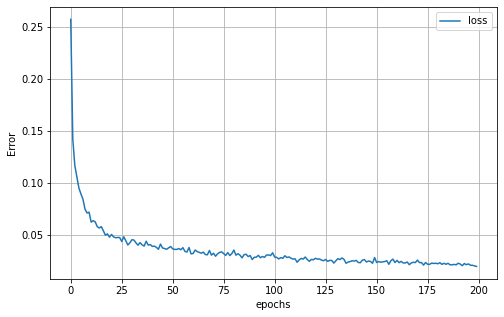

In [67]:
# visualing the train and validation losses
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel('Error')
plt.show()

600/600 [==============================] - 0s 123us/sample - loss: 0.0131
test loss: 0.013058506498734156


Text(0.5, 1.0, 'Dissipation strength')

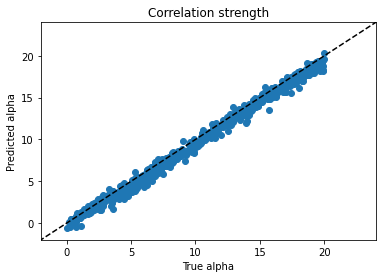

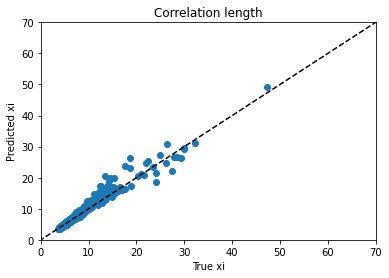

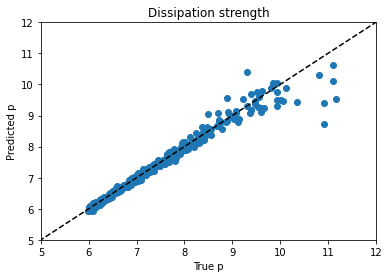

In [69]:
# check results on test set

results = nn.evaluate(M_test,mat_test, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test));
mat_test_sc = sc.inverse_transform(mat_test);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")


### Using whole curve to train the model and making predictions on Evaluation data and saving as .txt file

In [91]:
tensorflow.keras.backend.clear_session()

N = np.shape(M_train_full[0])[0] # number of input values from M(t) curve

# define the net
nn = Sequential()
nn.add(InputLayer(input_shape=N))
nn.add(Dense(400, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(75, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
nn.add(BatchNormalization())
nn.add(Dense(3, activation='linear'))

batch_size = 128
s = 200*len(M_train)//batch_size
learning_schedule = keras.optimizers.schedules.ExponentialDecay(0.001, s, 0.1)

nn.compile(loss='huber_loss', optimizer=Adam(learning_schedule))

In [92]:
history1 = nn.fit(M_train_full, mat_train_full, epochs=200,batch_size=128, verbose=2)

Train on 5400 samples
Epoch 1/200
5400/5400 - 2s - loss: 0.2502
Epoch 2/200
5400/5400 - 0s - loss: 0.1492
Epoch 3/200
5400/5400 - 0s - loss: 0.1157
Epoch 4/200
5400/5400 - 0s - loss: 0.1034
Epoch 5/200
5400/5400 - 0s - loss: 0.1033
Epoch 6/200
5400/5400 - 0s - loss: 0.0837
Epoch 7/200
5400/5400 - 0s - loss: 0.0795
Epoch 8/200
5400/5400 - 0s - loss: 0.0658
Epoch 9/200
5400/5400 - 0s - loss: 0.0690
Epoch 10/200
5400/5400 - 0s - loss: 0.0633
Epoch 11/200
5400/5400 - 0s - loss: 0.0591
Epoch 12/200
5400/5400 - 0s - loss: 0.0564
Epoch 13/200
5400/5400 - 0s - loss: 0.0573
Epoch 14/200
5400/5400 - 0s - loss: 0.0538
Epoch 15/200
5400/5400 - 0s - loss: 0.0551
Epoch 16/200
5400/5400 - 0s - loss: 0.0475
Epoch 17/200
5400/5400 - 0s - loss: 0.0476
Epoch 18/200
5400/5400 - 0s - loss: 0.0481
Epoch 19/200
5400/5400 - 0s - loss: 0.0507
Epoch 20/200
5400/5400 - 0s - loss: 0.0504
Epoch 21/200
5400/5400 - 0s - loss: 0.0423
Epoch 22/200
5400/5400 - 0s - loss: 0.0439
Epoch 23/200
5400/5400 - 0s - loss: 0.045

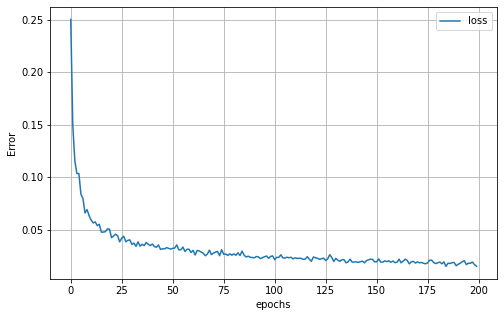

In [93]:
# visualing the train and validation losses
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel('Error')
plt.show()

600/600 [==============================] - 0s 394us/sample - loss: 0.0131
test loss: 0.013097868983944256


Text(0.5, 1.0, 'Dissipation strength')

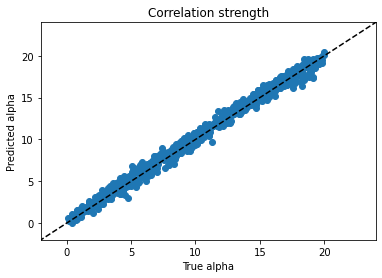

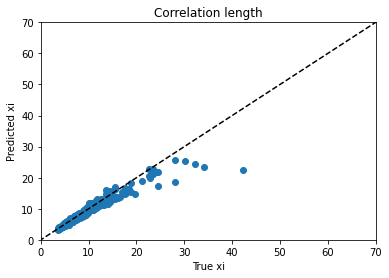

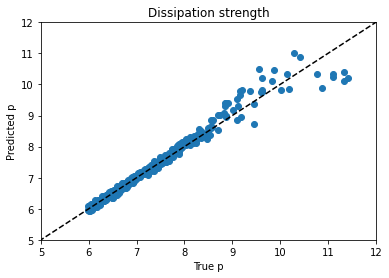

In [95]:
# check results on test set

results = nn.evaluate(M_test_full,mat_test_full, batch_size=32);
print("test loss:", results)
nn_test_sc = sc.inverse_transform(nn.predict(M_test_full));
mat_test_sc = sc.inverse_transform(mat_test_full);

plt.scatter(mat_test_sc[:,0],nn_test_sc[:,0]);
plt.plot([-100,100],[-100, 100],"--k")
plt.xlabel("True alpha");
plt.ylabel("Predicted alpha");
plt.axis([-2, 24, -2, 24])
plt.title("Correlation strength")

plt.figure()
plt.scatter(mat_test_sc[:,1],nn_test_sc[:,1]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True xi");
plt.ylabel("Predicted xi");
plt.axis([0, 70, 0, 70])
plt.title("Correlation length")

plt.figure()
plt.scatter(mat_test_sc[:,2],nn_test_sc[:,2]);
plt.plot([-100, 100],[-100, 100],"--k")
plt.xlabel("True p");
plt.ylabel("Predicted p");
plt.axis([5, 12, 5, 12])
plt.title("Dissipation strength")


### Prediction on evaluation data

In [100]:
y_eval = sc.inverse_transform(nn.predict(M_eval))
eval_file = f_prefix+"_mat_info_eval.txt"
np.savetxt(eval_file, y_eval, comments='#')

## Heatmap of important features in the time domain


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



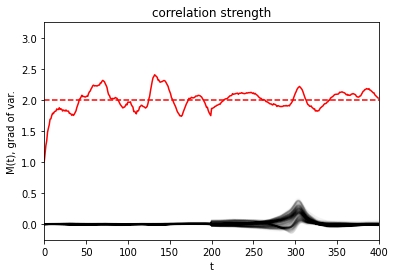

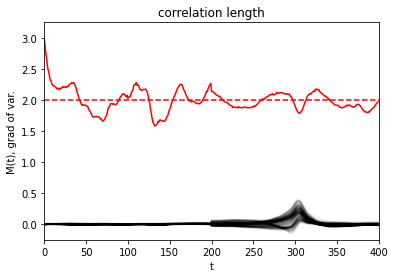

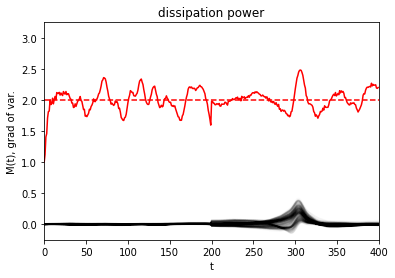

In [345]:
# heatmap of feature importance in the time domain
from keras import backend as k
import tensorflow as tf

var_names = ["correlation strength", "correlation length", "dissipation power"]

for tar_var in range(3):
    in_tensor = tf.convert_to_tensor(M_test) # we will track gradients w.r.t. M(t)
    with tf.GradientTape() as t:
        t.watch(in_tensor)
        tar_output = tf.gather(nn(in_tensor), tar_var, axis=1) # keep track of the tar_var output

    grads = t.gradient(tar_output, in_tensor).numpy() # comput gradient using tensorflow
    grad_sum = np.sum((grads),axis=0) # sum along all testing curves

    plt.figure()
    plt.plot((M_train[1:500,:]).T,color=(0,0,0,.025))
    plt.plot(2+grad_sum/np.max(np.abs(grad_sum)),'r')
    plt.plot([0, 400],[2, 2],'--r')
    plt.title(var_names[tar_var])
    plt.xlabel('t')
    plt.axis([0, 400, -.25, 3.25])
    plt.ylabel('M(t), grad of var.')
